# ENPM 673 Perception for Autonomous Robots

# Assignment 1

Question 1:Assume that you have a camera with a resolution of 5MP where the camera sensor is square shaped with a
width of 14mm. It is also given that the focal length of the camera is 15mm.
1. Compute the Field of View of the camera in the horizontal and vertical direction. 
2. Assuming you are detecting a square shaped object with width 5cm, placed at a distance of 20 meters from
the camera, compute the minimum number of pixels that the object will occupy in the image.

Solution:  Answer in the report

Question 2:
Two files of 2D data points are provided in the form of CSV files (Dataset_1 and Dataset_2). The data
represents measurements of a projectile with different noise levels and is shown in figure 1. Assuming that
the projectile follows the equation of a parabola,

1. Find the best method to fit a curve to the given data for each case. You have to plot the data and your
best fit curve for each case. Submit your code along with the instructions to run it.
2. Briefly explain all the steps of your solution and discuss why your choice of outlier rejection technique is best
for that case.

First step:

We import the required libraries and read the dataset. We use the read_csv function from the Pandas library to access the csv file of the dataset.

In [1]:
#Import Dataset and read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
data_1 = pd.read_csv(r"C:\Users\Kartik\Documents\ENPM673\Assignment 1\Dataset\data_1.csv")
data_2 = pd.read_csv(r"C:\Users\Kartik\Documents\ENPM673\Assignment 1\Dataset\data_2.csv")


Next step:

We convert the dataset into a list and then split the data into separate x and y variable lists.

In [2]:
data_1 = data_1.values.tolist()
data_2 = data_2.values.tolist()
#Split Data
x_data1 =[]
y_data1 =[]
x_data2 =[]
y_data2 =[]
for i in range(len(data_1)):
    x_data1.append(data_1[i][0])
    y_data1.append(data_1[i][1])
for i in range(len(data_2)):
    x_data2.append(data_2[i][0])
    y_data2.append(data_2[i][1])


Next step:

We plot both the datasets using functions from the matplotlib library.

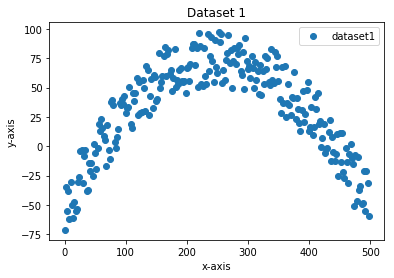

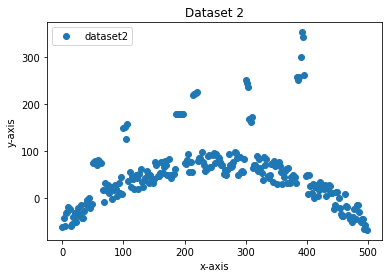

In [3]:

plt.figure()
plt.plot(x_data1, y_data1,'o', label= 'dataset1')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title("Dataset 1")
plt.legend()

plt.figure()
plt.plot(x_data2, y_data2,'o', label = 'dataset2')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title("Dataset 2")

plt.legend()
plt.show()

Next step:

We define a function to compute the power of a list.

In [4]:
def calc_power(list_val,power):
    out = []
    for i in range(len(list_val)):
        out.append(pow(list_val[i],power))    
    return out

Next step:

We then define a function to determine the model parameters a, b, c of the quadratic equation so that we can predict the output y for any given input x.

In [5]:

def build_Model(x,y):
    model_params=[]
    n= len(x)
    
    X = np.array([[       n           ,        sum(x)      ,sum(calc_power(x,2))],
                 [      sum(x)        ,sum(calc_power(x,2)),sum(calc_power(x,3))],
                 [sum(calc_power(x,2)),sum(calc_power(x,3)),sum(calc_power(x,4))]])
    xy  = [np.dot(x,y)]
    x2y = [np.dot(calc_power(x,2),y)]
    Y   = np.array([[(sum(y))],[(sum(xy))],[(sum(x2y))]])
    
    model_params = np.dot(np.linalg.inv(X),Y)

    return model_params

Next step:

We define a function to predict the output y using the model parameters and the input data x.

In [58]:
def predictOutput(x,y,A1):
    y_predict = A1[2]*calc_power(x,2)+A1[1]*x+A1[0]
    return y_predict




Next step:

Plot the output curve fit using the LMSE method.

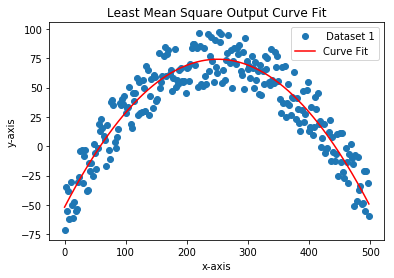

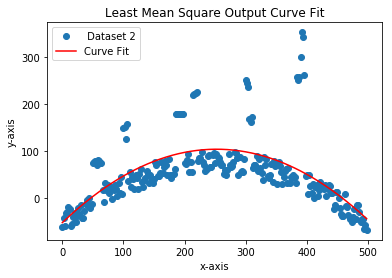

In [59]:
plt.figure()
plt.plot(x_data1, y_data1,'o', label= ' Dataset 1')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title("Least Mean Square Output Curve Fit")

plt.plot(x_data1,predictOutput(x_data1,y_data1,build_Model(x_data1,y_data1)), color='red', label= 'Curve Fit')
plt.legend()
plt.show()

plt.figure()
plt.plot(x_data2, y_data2,'o', label= ' Dataset 2')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title("Least Mean Square Output Curve Fit")
plt.plot(x_data2,predictOutput(x_data2,y_data2,build_Model(x_data2,y_data2)), color='red', label= 'Curve Fit')
plt.legend()

plt.show()

Next step:

We then define a function that implements the RANSAC algorithm.

RANSAC algorithm:
    1. Select three data points randomly from the dataset.
    2. Determine the model parameters for the quadratic from those three data points.
    3. Compare all the datapoints with the predicted model equation and classify them as inliers or outliers.
    4. Select a model that maximizes the ratio of inliers to outliers.
    5. Generate a curve fit from the final model.

In [55]:
def ransac(x_data,y_data, n, t, success_threshold):
    final_inliers_x=[]
    final_inliers_y=[]
    final_outliers_x=[]
    final_outliers_y=[]
    worstfit= 0
    prev_inliers=0
    #Number of iterations
    # n=10000
    
    #Threshold value
    # t=55

    #Worst possible error is infinite error
    worst_error = np.inf                                 

    for i in range(n):
        
        dataPoints = random.sample(range(len(x_data)), 3)
        #print(dataPoints)
        possible_inliers_x=[]
        possible_inliers_y=[]
        
        for i in dataPoints:
            possible_inliers_x.append(x_data[i])
            possible_inliers_y.append(y_data[i])
        test_Model = build_Model(possible_inliers_x,possible_inliers_y)
        y_predict = predictOutput(x_data,y_data,test_Model)
        print(possible_inliers_x)
        print(possible_inliers_y)

        num_inliers =0
        num_outliers =0
        valid_inliers_x=[0]
        valid_inliers_y=[0]
        valid_outliers_x=[0]
        valid_outliers_y=[0]
        
        for i in range(len(x_data)):
            
            if abs(y_data[i]-y_predict[i]) < t:
                valid_inliers_x.append(x_data[i])
                valid_inliers_y.append(y_data[i])
                num_inliers+=1
            else:
                valid_outliers_x.append(x_data[i])
                valid_outliers_y.append(y_data[i])
                num_outliers+=1
        
        if num_inliers > worstfit:
            worstfit=num_inliers
            
            print("######################################################################################")
            #Update chosen starting points
            
            input_points_x= possible_inliers_x
            input_points_y= possible_inliers_y
            
            #Update the model parameters
            update_model = build_Model(valid_inliers_x,valid_inliers_y)
            op= predictOutput(valid_inliers_x,valid_inliers_y,update_model)
            final_model = update_model
            
            #Update temperary variables to preserve data corresponding to the final chosen model.
            
            fin_inlier=num_inliers
            fin_outlier=num_outliers
            final_inliers_x=valid_inliers_x.copy()
            final_inliers_y=valid_inliers_y.copy()
            final_outliers_x=valid_outliers_x.copy()
            final_outliers_y=valid_outliers_y.copy()
            
            success_rate= (worstfit/len(x_data))*100
            
            if success_rate >= success_threshold: 
                break
            print(num_inliers,num_outliers)
        
    print(fin_inlier,fin_outlier)
     
    print('Worstfit=',worstfit)
    
    plt.figure()
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title("RANSAC Output Curve Fit")
    plt.plot(x_data,predictOutput(x_data,y_data,final_model), color='red',label='Curve Fit')
    plt.plot(x_data,y_data,'o', color='blue',label='Input Data')
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title("RANSAC Output Curve Fit")
    plt.plot(x_data,predictOutput(x_data,y_data,final_model), color='red',label='Curve Fit')
    plt.plot(final_inliers_x,final_inliers_y,'o', color='black',label='Inliers')
    plt.plot(final_outliers_x,final_outliers_y,'o', color='orange',label='Outliers')
    plt.plot(input_points_x,input_points_y,'o', color='green',label='Picked Points')
    plt.legend()
    plt.show()

Next step:

We plot the output curve fit for the first dataset using the RANSAC algorithm.

[80.0, 306.0, 30.0]
[34.89055259, 76.46961809, -31.50152301]
######################################################################################
167 83
[196.0, 334.0, 78.0]
[55.89393348, 55.04506814, 39.76357483]
######################################################################################
204 46
[416.0, 126.0, 204.0]
[18.78976704, 28.88649993, 55.16268167]
######################################################################################
250 0
Worstfit= 250


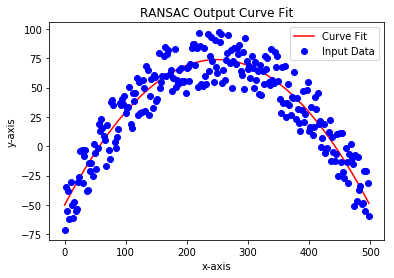

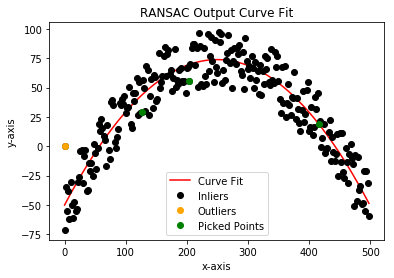

In [56]:
ransac(x_data1,y_data1, 10000, 45,95)

Next step:

We plot the output curve fit for the second dataset using the RANSAC algorithm.

[262.0, 222.0, 346.0]
[70.47248852, 78.31283191, 78.28510613]
######################################################################################
88 162
[342.0, 294.0, 498.0]
[73.07127522, 57.20512745, -67.392]
######################################################################################
103 147
[340.0, 28.0, 72.0]
[49.97016661, -33.91772007, 18.02086892]
######################################################################################
167 83
[138.0, 152.0, 328.0]
[58.31989171, 76.39998966, 38.09781073]
[308.0, 8.0, 490.0]
[162.0, -28.41277315, -44.89003018]
[406.0, 258.0, 180.0]
[25.807759100000002, 76.48884076, 49.15825606]
######################################################################################
171 79
[420.0, 320.0, 104.0]
[17.11506881, 58.31699803, 126.0]
[90.0, 418.0, 210.0]
[4.834509798, 4.167982307, 77.8668907]
######################################################################################
199 51
[400.0, 168.0, 34.0]
[48.71640907, 78.5410895

[214.0, 264.0, 32.0]
[220.0, 51.97961925, -41.66845472]
[266.0, 150.0, 248.0]
[61.06062120000001, 40.8246477, 95.47796784]
[244.0, 206.0, 374.0]
[67.10651727, 94.53354678, 45.48649999]
[390.0, 330.0, 290.0]
[300.0, 86.93069197, 87.61660039]
[386.0, 222.0, 236.0]
[252.0, 78.31283191, 61.79607085]
[214.0, 476.0, 46.0]
[220.0, -39.70879071, -20.24158231]
[268.0, 294.0, 230.0]
[50.09849438, 57.20512745, 77.81888394]
[454.0, 428.0, 222.0]
[-20.88116285, 19.16412708, 78.31283191]
[274.0, 110.0, 318.0]
[70.68934128, 56.04576631, 88.90747293]
[384.0, 420.0, 428.0]
[257.0, 17.11506881, 19.16412708]
[462.0, 382.0, 282.0]
[9.037138917, 33.369405300000004, 97.38000102]
[480.0, 446.0, 78.0]
[-45.10921527, -14.73052498, 21.62157483]
[6.0, 220.0, 496.0]
[-31.453386699999996, 226.0, -57.10606439]
[172.0, 106.0, 74.0]
[48.98332682, 158.0, 27.092233]
[96.0, 284.0, 472.0]
[44.47473886, 96.80384402, -44.91988124]
[440.0, 188.0, 358.0]
[11.27785132, 180.0, 56.16350831]
[384.0, 122.0, 396.0]
[257.0, 43.5363

[162.0, 19.16412708, 84.20139436]
[264.0, 476.0, 234.0]
[51.97961925, -39.70879071, 58.50813732]
[94.0, 392.0, 92.0]
[12.03779128, 353.0, 31.87371492]
[458.0, 110.0, 478.0]
[-36.75075442, 56.04576631, -22.96443861]
[310.0, 124.0, 274.0]
[172.0, 20.21248393, 70.68934128]
[452.0, 372.0, 420.0]
[0.175939775, 33.13745173, 17.11506881]
[426.0, 0.0, 176.0]
[21.33655567, -61.422, 48.64004898]
[162.0, 448.0, 170.0]
[77.21676789, 13.66075871, 70.13427258]
[84.0, 74.0, 262.0]
[17.37812179, 27.092233, 70.47248852]
[136.0, 364.0, 300.0]
[43.61264834, 57.93297098, 251.0]
[36.0, 18.0, 120.0]
[-27.69770446, -40.95763696, 48.82106561]
[344.0, 470.0, 136.0]
[33.66225506, -44.39661967, 43.61264834]
[130.0, 146.0, 292.0]
[34.44714561, 41.95057746, 55.93592831]
[100.0, 474.0, 382.0]
[150.0, -50.16627159, 33.369405300000004]
[434.0, 356.0, 2.0]
[19.18306868, 68.31642988, -42.28700013]
[18.0, 454.0, 458.0]
[-40.95763696, -20.88116285, -36.75075442]
[466.0, 46.0, 14.0]
[-18.26348283, -20.24158231, -59.509705

[376.0, 130.0, 146.0]
[42.90841948, 34.44714561, 41.95057746]
[182.0, 136.0, 346.0]
[52.32066644, 43.61264834, 78.28510613]
[14.0, 182.0, 288.0]
[-59.50970512, 52.32066644, 50.17314371]
[176.0, 430.0, 284.0]
[48.64004898, 28.04156972, 96.80384402]
[60.0, 162.0, 444.0]
[80.0, 77.21676789, -23.11693744]
[440.0, 288.0, 460.0]
[11.27785132, 50.17314371, -36.74424337]
[226.0, 62.0, 36.0]
[85.35511547, 75.5, -27.69770446]
[424.0, 498.0, 466.0]
[21.38585549, -67.392, -18.26348283]
[470.0, 306.0, 338.0]
[-44.39661967, 168.0, 42.49992923]
[344.0, 40.0, 336.0]
[33.66225506, -3.6924692830000003, 47.99956307]
[18.0, 234.0, 92.0]
[-40.95763696, 58.50813732, 31.87371492]
[358.0, 170.0, 188.0]
[56.16350831, 70.13427258, 180.0]
[394.0, 66.0, 350.0]
[343.0, 17.95300406, 71.65142194]
[396.0, 246.0, 186.0]
[262.0, 91.44080694, 180.0]
[420.0, 106.0, 164.0]
[17.11506881, 158.0, 53.27633722]
[20.0, 224.0, 18.0]
[-31.77979604, 86.14253807, -40.95763696]
[70.0, 148.0, 366.0]
[33.32937607, 32.03617696, 62.0255

[230.0, 30.0, 206.0]
[77.81888394, -14.34852301, 94.53354678]
[238.0, 62.0, 156.0]
[88.93587561, 75.5, 47.92328727]
[190.0, 344.0, 202.0]
[180.0, 33.66225506, 73.81668778]
[128.0, 384.0, 378.0]
[61.30838716, 257.0, 49.79021019]
[472.0, 480.0, 344.0]
[-44.91988124, -45.10921527, 33.66225506]
[32.0, 224.0, 264.0]
[-41.66845472, 86.14253807, 51.97961925]
[44.0, 496.0, 110.0]
[-0.260749198, -57.10606439, 56.04576631]
[120.0, 410.0, 388.0]
[48.82106561, 30.20734859, 258.0]
[442.0, 436.0, 84.0]
[10.13852133, 28.681125, 17.37812179]
[138.0, 88.0, 300.0]
[58.31989171, 18.8431759, 251.0]
[402.0, 304.0, 230.0]
[9.187654522, 237.0, 77.81888394]
[344.0, 306.0, 202.0]
[33.66225506, 168.0, 73.81668778]
[376.0, 124.0, 320.0]
[42.90841948, 20.21248393, 58.31699803]
[212.0, 158.0, 166.0]
[56.48736949, 46.76024292, 67.04077778]
[236.0, 412.0, 432.0]
[61.79607085, -0.505049822, 5.019883583]
[96.0, 140.0, 208.0]
[44.47473886, 51.19000631, 54.82628312]
[118.0, 148.0, 454.0]
[19.6546633, 32.03617696, -20.88

[186.0, 282.0, 242.0]
[180.0, 97.38000102, 66.55509882]
[448.0, 38.0, 492.0]
[13.66075871, -12.57702248, -43.23157947]
[460.0, 90.0, 480.0]
[-36.74424337, 4.834509798, -45.10921527]
[56.0, 12.0, 50.0]
[71.0, -23.96493236, 75.5]
[12.0, 132.0, 180.0]
[-23.96493236, 22.84477529, 49.15825606]
[410.0, 24.0, 310.0]
[30.20734859, -36.80150051, 172.0]
[96.0, 170.0, 216.0]
[44.47473886, 70.13427258, 222.0]
[190.0, 36.0, 140.0]
[180.0, -27.69770446, 51.19000631]
[446.0, 162.0, 478.0]
[-14.73052498, 77.21676789, -22.96443861]
[350.0, 258.0, 446.0]
[71.65142194, 76.48884076, -14.73052498]
[402.0, 160.0, 478.0]
[9.187654522, 54.07506979, -22.96443861]
[336.0, 480.0, 472.0]
[47.99956307, -45.10921527, -44.91988124]
[398.0, 296.0, 192.0]
[47.87203485, 55.77319782, 180.0]
[260.0, 230.0, 494.0]
[71.46922903, 77.81888394, -65.27725754]
[164.0, 216.0, 260.0]
[53.27633722, 222.0, 71.46922903]
[264.0, 444.0, 52.0]
[51.97961925, -23.11693744, 77.0]
[414.0, 82.0, 176.0]
[23.26842299, -1.813598426, 48.6400489

[410.0, 382.0, 370.0]
[30.20734859, 33.369405300000004, 64.39327471]
[160.0, 266.0, 404.0]
[54.07506979, 61.06062120000001, 49.55077120000001]
[486.0, 190.0, 174.0]
[-28.4623179, 180.0, 82.84425229]
[214.0, 450.0, 72.0]
[220.0, 13.37791363, 18.02086892]
[350.0, 276.0, 416.0]
[71.65142194, 67.09469938, 27.40376704]
[416.0, 436.0, 98.0]
[27.40376704, 28.681125, 9.027557668]
[142.0, 210.0, 12.0]
[32.50699213, 77.8668907, -23.96493236]
[326.0, 384.0, 158.0]
[54.06980071, 257.0, 46.76024292]
[288.0, 44.0, 236.0]
[50.17314371, -0.260749198, 61.79607085]
[194.0, 110.0, 340.0]
[180.0, 56.04576631, 49.97016661]
[452.0, 358.0, 384.0]
[0.175939775, 56.16350831, 257.0]
[166.0, 162.0, 88.0]
[67.04077778, 77.21676789, 18.8431759]
[230.0, 118.0, 130.0]
[77.81888394, 19.6546633, 34.44714561]
[456.0, 130.0, 400.0]
[-33.98339425, 34.44714561, 48.71640907]
[98.0, 38.0, 464.0]
[9.027557668, -12.57702248, -16.17560757]
[278.0, 364.0, 440.0]
[69.20292869, 57.93297098, 11.27785132]
[480.0, 374.0, 104.0]
[-45

[206.0, 118.0, 202.0]
[94.53354678, 19.6546633, 73.81668778]
[12.0, 320.0, 198.0]
[-23.96493236, 58.31699803, 180.0]
[4.0, 138.0, 174.0]
[-58.97612903, 58.31989171, 82.84425229]
[18.0, 452.0, 320.0]
[-40.95763696, 0.175939775, 58.31699803]
[322.0, 84.0, 178.0]
[84.20139436, 17.37812179, 42.12971691]
[142.0, 398.0, 34.0]
[32.50699213, 47.87203485, -41.1595152]
[418.0, 224.0, 28.0]
[4.167982307, 86.14253807, -33.91772007]
[456.0, 428.0, 338.0]
[-33.98339425, 19.16412708, 42.49992923]
[282.0, 222.0, 264.0]
[97.38000102, 78.31283191, 51.97961925]
[386.0, 316.0, 370.0]
[252.0, 71.39281905, 64.39327471]
[470.0, 478.0, 466.0]
[-44.39661967, -22.96443861, -18.26348283]
[72.0, 18.0, 286.0]
[18.02086892, -40.95763696, 86.21655825]
[48.0, 316.0, 56.0]
[-11.881544199999999, 71.39281905, 71.0]
[252.0, 82.0, 426.0]
[94.02590332, -1.813598426, 21.33655567]
[440.0, 454.0, 428.0]
[11.27785132, -20.88116285, 19.16412708]
[62.0, 294.0, 262.0]
[75.5, 57.20512745, 70.47248852]
[54.0, 242.0, 362.0]
[79.0, 6

[108.0, 396.0, 480.0]
[35.59372013, 262.0, -45.10921527]
[284.0, 428.0, 472.0]
[96.80384402, 19.16412708, -44.91988124]
[476.0, 58.0, 288.0]
[-39.70879071, 81.0, 50.17314371]
[148.0, 76.0, 200.0]
[32.03617696, 10.5024683, 75.64056512]
[70.0, 60.0, 486.0]
[33.32937607, 80.0, -28.4623179]
[276.0, 388.0, 228.0]
[67.09469938, 258.0, 98.85056409]
[48.0, 30.0, 104.0]
[-11.881544199999999, -14.34852301, 126.0]
[0.0, 312.0, 418.0]
[-61.422, 65.2, 4.167982307]
[482.0, 210.0, 192.0]
[-14.41612071, 77.8668907, 180.0]
[498.0, 380.0, 130.0]
[-67.392, 44.87887213, 34.44714561]
[88.0, 40.0, 398.0]
[18.8431759, -3.6924692830000003, 47.87203485]
[416.0, 364.0, 174.0]
[27.40376704, 57.93297098, 82.84425229]
[206.0, 130.0, 0.0]
[94.53354678, 34.44714561, -61.422]
[172.0, 328.0, 390.0]
[48.98332682, 38.09781073, 300.0]
[152.0, 214.0, 88.0]
[76.39998966, 220.0, 18.8431759]
[182.0, 252.0, 348.0]
[52.32066644, 94.02590332, 67.98082842]
[434.0, 268.0, 296.0]
[19.18306868, 50.09849438, 55.77319782]
[418.0, 382

[158.0, 396.0, 188.0]
[46.76024292, 262.0, 180.0]
[196.0, 16.0, 132.0]
[180.0, -54.01060665, 22.84477529]
[228.0, 158.0, 408.0]
[98.85056409, 46.76024292, 11.30761823]
[376.0, 496.0, 16.0]
[42.90841948, -57.10606439, -54.01060665]
[118.0, 324.0, 482.0]
[19.6546633, 64.84266192, -14.41612071]
[272.0, 218.0, 18.0]
[93.08085442, 224.0, -40.95763696]
[82.0, 54.0, 180.0]
[-1.813598426, 79.0, 49.15825606]
[380.0, 376.0, 256.0]
[44.87887213, 42.90841948, 85.62432372]
[484.0, 358.0, 356.0]
[-15.18015492, 56.16350831, 68.31642988]
[328.0, 46.0, 236.0]
[38.09781073, -20.24158231, 61.79607085]
[180.0, 400.0, 236.0]
[49.15825606, 48.71640907, 61.79607085]
[338.0, 370.0, 246.0]
[42.49992923, 64.39327471, 91.44080694]
[492.0, 266.0, 180.0]
[-43.23157947, 61.06062120000001, 49.15825606]
[402.0, 392.0, 92.0]
[9.187654522, 353.0, 31.87371492]
[228.0, 272.0, 242.0]
[98.85056409, 93.08085442, 66.55509882]
[338.0, 70.0, 280.0]
[42.49992923, 33.32937607, 76.23602924]
[210.0, 168.0, 340.0]
[77.8668907, 78.5

[252.0, 222.0, 67.09469938]
[368.0, 260.0, 68.0]
[31.6779689, 71.46922903, -8.770245544]
[90.0, 136.0, 272.0]
[4.834509798, 43.61264834, 93.08085442]
[494.0, 180.0, 14.0]
[-65.27725754, 49.15825606, -59.50970512]
[0.0, 164.0, 394.0]
[-61.422, 53.27633722, 343.0]
[354.0, 332.0, 190.0]
[77.10922267, 69.60944444, 180.0]
[6.0, 166.0, 428.0]
[-31.453386699999996, 67.04077778, 19.16412708]
[220.0, 482.0, 312.0]
[226.0, -14.41612071, 65.2]
[2.0, 282.0, 104.0]
[-42.28700013, 97.38000102, 126.0]
[104.0, 28.0, 146.0]
[126.0, -33.91772007, 41.95057746]
[420.0, 190.0, 74.0]
[17.11506881, 180.0, 27.092233]
[136.0, 166.0, 334.0]
[43.61264834, 67.04077778, 83.60706814]
[492.0, 262.0, 484.0]
[-43.23157947, 70.47248852, -15.18015492]
[300.0, 76.0, 412.0]
[251.0, 10.5024683, -0.505049822]
[362.0, 396.0, 372.0]
[44.09327887, 262.0, 33.13745173]
[112.0, 118.0, 84.0]
[24.10868371, 19.6546633, 17.37812179]
[154.0, 364.0, 242.0]
[69.75720285, 57.93297098, 66.55509882]
[120.0, 18.0, 488.0]
[48.82106561, -40.9

[144.0, 40.0, 310.0]
[49.44684918, -3.6924692830000003, 172.0]
[324.0, 222.0, 194.0]
[64.84266192, 78.31283191, 180.0]
[480.0, 148.0, 12.0]
[-45.10921527, 32.03617696, -23.96493236]
[336.0, 418.0, 292.0]
[47.99956307, 4.167982307, 55.93592831]
[344.0, 380.0, 124.0]
[33.66225506, 44.87887213, 20.21248393]
[298.0, 186.0, 438.0]
[83.44613942, 180.0, 26.36005255]
[144.0, 18.0, 4.0]
[49.44684918, -40.95763696, -58.97612903]
[386.0, 488.0, 16.0]
[252.0, -50.31760965, -54.01060665]
[294.0, 52.0, 238.0]
[57.20512745, 77.0, 88.93587561]
[344.0, 174.0, 78.0]
[33.66225506, 82.84425229, 21.62157483]
[182.0, 360.0, 222.0]
[52.32066644, 30.64845798, 78.31283191]
[134.0, 12.0, 410.0]
[38.68027621, -23.96493236, 30.20734859]
[314.0, 78.0, 492.0]
[70.3, 21.62157483, -43.23157947]
[448.0, 454.0, 158.0]
[13.66075871, -20.88116285, 46.76024292]
[220.0, 270.0, 364.0]
[226.0, 59.90623879, 57.93297098]
[136.0, 482.0, 76.0]
[43.61264834, -14.41612071, 10.5024683]
[408.0, 386.0, 310.0]
[11.30761823, 252.0, 172

[270.0, 408.0, 294.0]
[59.90623879, 11.30761823, 57.20512745]
[6.0, 470.0, 80.0]
[-31.453386699999996, -44.39661967, 24.01655259]
[220.0, 364.0, 86.0]
[226.0, 57.93297098, 28.84171323]
[4.0, 480.0, 172.0]
[-58.97612903, -45.10921527, 48.98332682]
[250.0, 268.0, 210.0]
[75.31399997, 50.09849438, 77.8668907]
[118.0, 28.0, 194.0]
[19.6546633, -33.91772007, 180.0]
[98.0, 80.0, 234.0]
[9.027557668, 24.01655259, 58.50813732]
[354.0, 118.0, 326.0]
[77.10922267, 19.6546633, 54.06980071]
[2.0, 440.0, 458.0]
[-42.28700013, 11.27785132, -36.75075442]
[24.0, 90.0, 48.0]
[-36.80150051, 4.834509798, -11.881544199999999]
[440.0, 276.0, 156.0]
[11.27785132, 67.09469938, 47.92328727]
[82.0, 370.0, 64.0]
[-1.813598426, 64.39327471, 75.5]
[354.0, 122.0, 190.0]
[77.10922267, 43.53633916, 180.0]
[194.0, 298.0, 312.0]
[180.0, 83.44613942, 65.2]
[102.0, 214.0, 136.0]
[151.0, 220.0, 43.61264834]
[152.0, 20.0, 122.0]
[76.39998966, -31.77979604, 43.53633916]
[406.0, 172.0, 18.0]
[25.807759100000002, 48.98332682

[-36.80150051, -14.34852301, 18.8431759]
[294.0, 238.0, 346.0]
[57.20512745, 88.93587561, 78.28510613]
[8.0, 330.0, 494.0]
[-28.41277315, 86.93069197, -65.27725754]
[28.0, 236.0, 394.0]
[-33.91772007, 61.79607085, 343.0]
[278.0, 84.0, 286.0]
[69.20292869, 17.37812179, 86.21655825]
[18.0, 496.0, 120.0]
[-40.95763696, -57.10606439, 48.82106561]
[292.0, 364.0, 374.0]
[55.93592831, 57.93297098, 45.48649999]
[100.0, 102.0, 494.0]
[150.0, 151.0, -65.27725754]
[30.0, 444.0, 318.0]
[-14.34852301, -23.11693744, 88.90747293]
[408.0, 352.0, 496.0]
[11.30761823, 29.833886699999997, -57.10606439]
[486.0, 480.0, 62.0]
[-28.4623179, -45.10921527, 75.5]
[320.0, 40.0, 430.0]
[58.31699803, -3.6924692830000003, 28.04156972]
[202.0, 282.0, 62.0]
[73.81668778, 97.38000102, 75.5]
[298.0, 262.0, 328.0]
[83.44613942, 70.47248852, 38.09781073]
[318.0, 410.0, 306.0]
[88.90747293, 30.20734859, 168.0]
[404.0, 10.0, 214.0]
[49.55077120000001, -17.62328837, 220.0]
[206.0, 208.0, 360.0]
[94.53354678, 54.82628312, 30

[394.0, 210.0, 252.0]
[343.0, 77.8668907, 94.02590332]
[38.0, 26.0, 60.0]
[-12.57702248, -20.061045899999996, 80.0]
[410.0, 306.0, 208.0]
[30.20734859, 168.0, 54.82628312]
[366.0, 14.0, 62.0]
[62.02553433, -59.50970512, 75.5]
[336.0, 266.0, 258.0]
[47.99956307, 61.06062120000001, 76.48884076]
[40.0, 478.0, 280.0]
[-3.6924692830000003, -22.96443861, 76.23602924]
[224.0, 472.0, 166.0]
[86.14253807, -44.91988124, 67.04077778]
[392.0, 408.0, 272.0]
[353.0, 11.30761823, 93.08085442]
[132.0, 448.0, 316.0]
[22.84477529, 13.66075871, 71.39281905]
[270.0, 320.0, 404.0]
[59.90623879, 58.31699803, 49.55077120000001]
[78.0, 34.0, 190.0]
[21.62157483, -41.1595152, 180.0]
[22.0, 174.0, 474.0]
[-50.26508389, 82.84425229, -50.16627159]
[298.0, 480.0, 424.0]
[83.44613942, -45.10921527, 21.38585549]
[328.0, 206.0, 20.0]
[38.09781073, 94.53354678, -31.77979604]
[484.0, 458.0, 418.0]
[-15.18015492, -36.75075442, 4.167982307]
[480.0, 482.0, 8.0]
[-45.10921527, -14.41612071, -28.41277315]
[222.0, 108.0, 192

[22.0, 264.0, 452.0]
[-50.26508389, 51.97961925, 0.175939775]
[44.0, 4.0, 22.0]
[-0.260749198, -58.97612903, -50.26508389]
[108.0, 52.0, 478.0]
[35.59372013, 77.0, -22.96443861]
[496.0, 48.0, 360.0]
[-57.10606439, -11.881544199999999, 30.64845798]
[376.0, 272.0, 498.0]
[42.90841948, 93.08085442, -67.392]
[276.0, 488.0, 22.0]
[67.09469938, -50.31760965, -50.26508389]
[316.0, 192.0, 176.0]
[71.39281905, 180.0, 48.64004898]
[154.0, 276.0, 262.0]
[69.75720285, 67.09469938, 70.47248852]
[448.0, 190.0, 432.0]
[13.66075871, 180.0, 5.019883583]
[128.0, 356.0, 294.0]
[61.30838716, 68.31642988, 57.20512745]
[186.0, 320.0, 446.0]
[180.0, 58.31699803, -14.73052498]
[52.0, 322.0, 238.0]
[77.0, 84.20139436, 88.93587561]
[282.0, 176.0, 450.0]
[97.38000102, 48.64004898, 13.37791363]
[492.0, 48.0, 166.0]
[-43.23157947, -11.881544199999999, 67.04077778]
[448.0, 56.0, 274.0]
[13.66075871, 71.0, 70.68934128]
[96.0, 452.0, 192.0]
[44.47473886, 0.175939775, 180.0]
[462.0, 140.0, 452.0]
[9.037138917, 51.1900

[340.0, 482.0, 242.0]
[49.97016661, -14.41612071, 66.55509882]
[228.0, 424.0, 258.0]
[98.85056409, 21.38585549, 76.48884076]
[176.0, 350.0, 84.0]
[48.64004898, 71.65142194, 17.37812179]
[214.0, 242.0, 330.0]
[220.0, 66.55509882, 86.93069197]
[410.0, 350.0, 54.0]
[30.20734859, 71.65142194, 79.0]
[380.0, 426.0, 422.0]
[44.87887213, 21.33655567, 33.61402653]
[410.0, 226.0, 364.0]
[30.20734859, 85.35511547, 57.93297098]
[210.0, 134.0, 372.0]
[77.8668907, 38.68027621, 33.13745173]
[424.0, 46.0, 154.0]
[21.38585549, -20.24158231, 69.75720285]
[188.0, 228.0, 70.0]
[180.0, 98.85056409, 33.32937607]
[338.0, 390.0, 200.0]
[42.49992923, 300.0, 75.64056512]
[168.0, 344.0, 436.0]
[78.54108956, 33.66225506, 28.681125]
[358.0, 168.0, 310.0]
[56.16350831, 78.54108956, 172.0]
[276.0, 394.0, 410.0]
[67.09469938, 343.0, 30.20734859]
[384.0, 246.0, 136.0]
[257.0, 91.44080694, 43.61264834]
[46.0, 128.0, 202.0]
[-20.24158231, 61.30838716, 73.81668778]
[64.0, 256.0, 186.0]
[75.5, 85.62432372, 180.0]
[332.0, 

[32.0, 416.0, 48.0]
[-41.66845472, 27.40376704, -11.881544199999999]
[428.0, 280.0, 208.0]
[19.16412708, 76.23602924, 54.82628312]
[320.0, 110.0, 60.0]
[58.31699803, 56.04576631, 80.0]
[436.0, 388.0, 248.0]
[28.681125, 258.0, 95.47796784]
[358.0, 182.0, 26.0]
[56.16350831, 52.32066644, -20.061045899999996]
[412.0, 162.0, 152.0]
[-0.505049822, 77.21676789, 76.39998966]
[256.0, 222.0, 390.0]
[85.62432372, 78.31283191, 300.0]
[370.0, 258.0, 224.0]
[64.39327471, 76.48884076, 86.14253807]
[58.0, 368.0, 86.0]
[81.0, 31.6779689, 28.84171323]
[198.0, 406.0, 144.0]
[180.0, 25.807759100000002, 49.44684918]
[122.0, 474.0, 224.0]
[43.53633916, -50.16627159, 86.14253807]
[432.0, 102.0, 416.0]
[5.019883583, 151.0, 27.40376704]
[42.0, 6.0, 370.0]
[-15.60304485, -31.453386699999996, 64.39327471]
[340.0, 264.0, 60.0]
[49.97016661, 51.97961925, 80.0]
[462.0, 402.0, 262.0]
[9.037138917, 9.187654522, 70.47248852]
[152.0, 202.0, 158.0]
[76.39998966, 73.81668778, 46.76024292]
[334.0, 282.0, 260.0]
[83.60706

[392.0, 324.0, 302.0]
[353.0, 64.84266192, 245.0]
[384.0, 116.0, 140.0]
[257.0, 41.22913221, 51.19000631]
[186.0, 188.0, 170.0]
[180.0, 180.0, 70.13427258]
[348.0, 62.0, 80.0]
[67.98082842, 75.5, 24.01655259]
[118.0, 152.0, 220.0]
[19.6546633, 76.39998966, 226.0]
[454.0, 172.0, 24.0]
[-20.88116285, 48.98332682, -36.80150051]
[268.0, 306.0, 216.0]
[50.09849438, 168.0, 222.0]
[56.0, 412.0, 188.0]
[71.0, -0.505049822, 180.0]
[282.0, 106.0, 302.0]
[97.38000102, 158.0, 245.0]
[274.0, 188.0, 228.0]
[70.68934128, 180.0, 98.85056409]
[274.0, 170.0, 56.0]
[70.68934128, 70.13427258, 71.0]
[420.0, 124.0, 4.0]
[17.11506881, 20.21248393, -58.97612903]
[494.0, 340.0, 312.0]
[-65.27725754, 49.97016661, 65.2]
[388.0, 200.0, 208.0]
[258.0, 75.64056512, 54.82628312]
[156.0, 238.0, 486.0]
[47.92328727, 88.93587561, -28.4623179]
[456.0, 328.0, 390.0]
[-33.98339425, 38.09781073, 300.0]
[174.0, 244.0, 92.0]
[82.84425229, 67.10651727, 31.87371492]
[70.0, 106.0, 52.0]
[33.32937607, 158.0, 77.0]
[152.0, 414.0,

[472.0, 124.0, 148.0]
[-44.91988124, 20.21248393, 32.03617696]
[150.0, 264.0, 336.0]
[40.8246477, 51.97961925, 47.99956307]
[242.0, 142.0, 472.0]
[66.55509882, 32.50699213, -44.91988124]
[196.0, 264.0, 464.0]
[180.0, 51.97961925, -16.17560757]
[26.0, 386.0, 338.0]
[-20.061045899999996, 252.0, 42.49992923]
[412.0, 390.0, 438.0]
[-0.505049822, 300.0, 26.36005255]
[236.0, 392.0, 456.0]
[61.79607085, 353.0, -33.98339425]
[388.0, 152.0, 430.0]
[258.0, 76.39998966, 28.04156972]
[322.0, 370.0, 244.0]
[84.20139436, 64.39327471, 67.10651727]
[182.0, 120.0, 408.0]
[52.32066644, 48.82106561, 11.30761823]
[438.0, 480.0, 136.0]
[26.36005255, -45.10921527, 43.61264834]
[480.0, 228.0, 458.0]
[-45.10921527, 98.85056409, -36.75075442]
[304.0, 300.0, 126.0]
[237.0, 251.0, 52.24649993]
[480.0, 146.0, 242.0]
[-45.10921527, 41.95057746, 66.55509882]
[174.0, 372.0, 430.0]
[82.84425229, 33.13745173, 28.04156972]
[142.0, 100.0, 22.0]
[32.50699213, 150.0, -50.26508389]
[186.0, 78.0, 276.0]
[180.0, 21.62157483,

[88.0, 24.0, 64.0]
[18.8431759, -36.80150051, 75.5]
[6.0, 166.0, 326.0]
[-31.453386699999996, 67.04077778, 54.06980071]
[40.0, 220.0, 22.0]
[-3.6924692830000003, 226.0, -50.26508389]
[380.0, 394.0, 192.0]
[44.87887213, 343.0, 180.0]
[82.0, 492.0, 46.0]
[-1.813598426, -43.23157947, -20.24158231]
[64.0, 162.0, 152.0]
[75.5, 77.21676789, 76.39998966]
[72.0, 348.0, 344.0]
[18.02086892, 67.98082842, 33.66225506]
[104.0, 228.0, 414.0]
[126.0, 98.85056409, 23.26842299]
[342.0, 6.0, 252.0]
[73.07127522, -31.453386699999996, 94.02590332]
[244.0, 306.0, 154.0]
[67.10651727, 168.0, 69.75720285]
[198.0, 246.0, 330.0]
[180.0, 91.44080694, 86.93069197]
[96.0, 334.0, 470.0]
[44.47473886, 83.60706814, -44.39661967]
[60.0, 382.0, 226.0]
[80.0, 33.369405300000004, 85.35511547]
[288.0, 20.0, 370.0]
[50.17314371, -31.77979604, 64.39327471]
[188.0, 244.0, 422.0]
[180.0, 67.10651727, 33.61402653]
[332.0, 226.0, 196.0]
[69.60944444, 85.35511547, 180.0]
[344.0, 70.0, 424.0]
[33.66225506, 33.32937607, 21.38585

[104.0, 390.0, 336.0]
[126.0, 300.0, 47.99956307]
[156.0, 86.0, 436.0]
[47.92328727, 28.84171323, 28.681125]
[44.0, 424.0, 32.0]
[-0.260749198, 21.38585549, -41.66845472]
[128.0, 92.0, 122.0]
[61.30838716, 31.87371492, 43.53633916]
[480.0, 318.0, 384.0]
[-45.10921527, 88.90747293, 257.0]
[426.0, 342.0, 70.0]
[21.33655567, 73.07127522, 33.32937607]
[222.0, 150.0, 422.0]
[78.31283191, 40.8246477, 33.61402653]
[412.0, 260.0, 296.0]
[-0.505049822, 71.46922903, 55.77319782]
[370.0, 188.0, 468.0]
[64.39327471, 180.0, -35.26748686]
[454.0, 488.0, 452.0]
[-20.88116285, -50.31760965, 0.175939775]
[312.0, 298.0, 392.0]
[65.2, 83.44613942, 353.0]
[278.0, 24.0, 218.0]
[69.20292869, -36.80150051, 224.0]
[102.0, 14.0, 136.0]
[151.0, -59.50970512, 43.61264834]
[332.0, 166.0, 386.0]
[69.60944444, 67.04077778, 252.0]
[290.0, 394.0, 124.0]
[87.61660039, 343.0, 20.21248393]
[144.0, 306.0, 332.0]
[49.44684918, 168.0, 69.60944444]
[132.0, 278.0, 268.0]
[22.84477529, 69.20292869, 50.09849438]
[102.0, 34.0, 

[-61.422, 48.71640907, 252.0]
[306.0, 76.0, 132.0]
[168.0, 10.5024683, 22.84477529]
[162.0, 114.0, 166.0]
[77.21676789, 46.11047235, 67.04077778]
[8.0, 498.0, 404.0]
[-28.41277315, -67.392, 49.55077120000001]
[380.0, 68.0, 20.0]
[44.87887213, -8.770245544, -31.77979604]
[378.0, 86.0, 440.0]
[49.79021019, 28.84171323, 11.27785132]
[444.0, 278.0, 464.0]
[-23.11693744, 69.20292869, -16.17560757]
[454.0, 354.0, 8.0]
[-20.88116285, 77.10922267, -28.41277315]
[342.0, 106.0, 2.0]
[73.07127522, 158.0, -42.28700013]
[278.0, 102.0, 482.0]
[69.20292869, 151.0, -14.41612071]
[284.0, 12.0, 362.0]
[96.80384402, -23.96493236, 44.09327887]
[92.0, 298.0, 18.0]
[31.87371492, 83.44613942, -40.95763696]
[96.0, 170.0, 76.0]
[44.47473886, 70.13427258, 10.5024683]
[110.0, 2.0, 38.0]
[56.04576631, -42.28700013, -12.57702248]
[110.0, 192.0, 168.0]
[56.04576631, 180.0, 78.54108956]
[460.0, 22.0, 494.0]
[-36.74424337, -50.26508389, -65.27725754]
[54.0, 50.0, 90.0]
[79.0, 75.5, 4.834509798]
[470.0, 316.0, 490.0]


[168.0, 118.0, 300.0]
[78.54108956, 19.6546633, 251.0]
[258.0, 250.0, 442.0]
[76.48884076, 75.31399997, 10.13852133]
[370.0, 134.0, 210.0]
[64.39327471, 38.68027621, 77.8668907]
[210.0, 198.0, 88.0]
[77.8668907, 180.0, 18.8431759]
[288.0, 278.0, 158.0]
[50.17314371, 69.20292869, 46.76024292]
[432.0, 424.0, 146.0]
[5.019883583, 21.38585549, 41.95057746]
[90.0, 388.0, 292.0]
[4.834509798, 258.0, 55.93592831]
[222.0, 34.0, 238.0]
[78.31283191, -41.1595152, 88.93587561]
[390.0, 88.0, 74.0]
[300.0, 18.8431759, 27.092233]
[256.0, 124.0, 198.0]
[85.62432372, 20.21248393, 180.0]
[68.0, 426.0, 410.0]
[-8.770245544, 21.33655567, 30.20734859]
[206.0, 482.0, 414.0]
[94.53354678, -14.41612071, 23.26842299]
[58.0, 392.0, 214.0]
[81.0, 353.0, 220.0]
[280.0, 190.0, 496.0]
[76.23602924, 180.0, -57.10606439]
[312.0, 314.0, 326.0]
[65.2, 70.3, 54.06980071]
[494.0, 280.0, 258.0]
[-65.27725754, 76.23602924, 76.48884076]
[188.0, 286.0, 240.0]
[180.0, 86.21655825, 92.12155159999999]
[42.0, 60.0, 116.0]
[-15.

[17.37812179, 258.0, 33.66225506]
[24.0, 300.0, 170.0]
[-36.80150051, 251.0, 70.13427258]
[0.0, 274.0, 388.0]
[-61.422, 70.68934128, 258.0]
[348.0, 228.0, 96.0]
[67.98082842, 98.85056409, 44.47473886]
[134.0, 496.0, 278.0]
[38.68027621, -57.10606439, 69.20292869]
[36.0, 388.0, 352.0]
[-27.69770446, 258.0, 29.833886699999997]
[230.0, 368.0, 142.0]
[77.81888394, 31.6779689, 32.50699213]
[326.0, 330.0, 284.0]
[54.06980071, 86.93069197, 96.80384402]
[360.0, 220.0, 268.0]
[30.64845798, 226.0, 50.09849438]
[20.0, 190.0, 434.0]
[-31.77979604, 180.0, 19.18306868]
[472.0, 268.0, 374.0]
[-44.91988124, 50.09849438, 45.48649999]
[448.0, 490.0, 244.0]
[13.66075871, -44.89003018, 67.10651727]
[32.0, 44.0, 270.0]
[-41.66845472, -0.260749198, 59.90623879]
[122.0, 12.0, 422.0]
[43.53633916, -23.96493236, 33.61402653]
[432.0, 322.0, 158.0]
[5.019883583, 84.20139436, 46.76024292]
[456.0, 146.0, 430.0]
[-33.98339425, 41.95057746, 28.04156972]
[238.0, 24.0, 140.0]
[88.93587561, -36.80150051, 51.19000631]
[

[112.0, 120.0, 406.0]
[24.10868371, 48.82106561, 25.807759100000002]
[250.0, 406.0, 2.0]
[75.31399997, 25.807759100000002, -42.28700013]
[78.0, 312.0, 484.0]
[21.62157483, 65.2, -15.18015492]
[30.0, 50.0, 430.0]
[-14.34852301, 75.5, 28.04156972]
[272.0, 144.0, 388.0]
[93.08085442, 49.44684918, 258.0]
[206.0, 324.0, 194.0]
[94.53354678, 64.84266192, 180.0]
[382.0, 124.0, 176.0]
[33.369405300000004, 20.21248393, 48.64004898]
[258.0, 36.0, 290.0]
[76.48884076, -27.69770446, 87.61660039]
[302.0, 106.0, 78.0]
[245.0, 158.0, 21.62157483]
[104.0, 46.0, 324.0]
[126.0, -20.24158231, 64.84266192]
[16.0, 334.0, 86.0]
[-54.01060665, 83.60706814, 28.84171323]
[28.0, 380.0, 60.0]
[-33.91772007, 44.87887213, 80.0]
[210.0, 170.0, 338.0]
[77.8668907, 70.13427258, 42.49992923]
[20.0, 206.0, 24.0]
[-31.77979604, 94.53354678, -36.80150051]
[458.0, 106.0, 462.0]
[-36.75075442, 158.0, 9.037138917]
[62.0, 394.0, 246.0]
[75.5, 343.0, 91.44080694]
[496.0, 264.0, 262.0]
[-57.10606439, 51.97961925, 70.47248852]


[420.0, 14.0, 450.0]
[17.11506881, -59.50970512, 13.37791363]
[164.0, 10.0, 110.0]
[53.27633722, -17.62328837, 56.04576631]
[306.0, 18.0, 4.0]
[168.0, -40.95763696, -58.97612903]
[402.0, 234.0, 102.0]
[9.187654522, 58.50813732, 151.0]
[214.0, 54.0, 204.0]
[220.0, 79.0, 82.02768167]
[154.0, 292.0, 194.0]
[69.75720285, 55.93592831, 180.0]
[316.0, 146.0, 150.0]
[71.39281905, 41.95057746, 40.8246477]
[388.0, 184.0, 38.0]
[258.0, 62.75394805, -12.57702248]
[198.0, 136.0, 274.0]
[180.0, 43.61264834, 70.68934128]
[308.0, 426.0, 250.0]
[162.0, 21.33655567, 75.31399997]
[246.0, 358.0, 364.0]
[91.44080694, 56.16350831, 57.93297098]
[14.0, 308.0, 162.0]
[-59.50970512, 162.0, 77.21676789]
[70.0, 46.0, 208.0]
[33.32937607, -20.24158231, 54.82628312]
[146.0, 156.0, 132.0]
[41.95057746, 47.92328727, 22.84477529]
[470.0, 206.0, 16.0]
[-44.39661967, 94.53354678, -54.01060665]
[368.0, 206.0, 430.0]
[31.6779689, 94.53354678, 28.04156972]
[118.0, 168.0, 144.0]
[19.6546633, 78.54108956, 49.44684918]
[148.0

[77.8668907, 62.75394805, 76.48884076]
[230.0, 148.0, 72.0]
[77.81888394, 32.03617696, 18.02086892]
[54.0, 252.0, 284.0]
[79.0, 94.02590332, 96.80384402]
[312.0, 0.0, 268.0]
[65.2, -61.422, 50.09849438]
[496.0, 2.0, 44.0]
[-57.10606439, -42.28700013, -0.260749198]
[246.0, 250.0, 458.0]
[91.44080694, 75.31399997, -36.75075442]
[24.0, 484.0, 386.0]
[-36.80150051, -15.18015492, 252.0]
[150.0, 134.0, 20.0]
[40.8246477, 38.68027621, -31.77979604]
[384.0, 172.0, 296.0]
[257.0, 48.98332682, 55.77319782]
[474.0, 100.0, 232.0]
[-50.16627159, 150.0, 70.57607501]
[354.0, 112.0, 318.0]
[77.10922267, 24.10868371, 88.90747293]
[218.0, 474.0, 316.0]
[224.0, -50.16627159, 71.39281905]
[222.0, 494.0, 76.0]
[78.31283191, -65.27725754, 10.5024683]
[42.0, 244.0, 196.0]
[-15.60304485, 67.10651727, 180.0]
[234.0, 300.0, 378.0]
[58.50813732, 251.0, 49.79021019]
[464.0, 328.0, 102.0]
[-16.17560757, 38.09781073, 151.0]
[338.0, 372.0, 42.0]
[42.49992923, 33.13745173, -15.60304485]
[270.0, 14.0, 36.0]
[59.906238

[212.0, 450.0, 108.0]
[56.48736949, 13.37791363, 35.59372013]
[334.0, 80.0, 456.0]
[83.60706814, 24.01655259, -33.98339425]
[256.0, 202.0, 206.0]
[85.62432372, 73.81668778, 94.53354678]
[262.0, 478.0, 252.0]
[70.47248852, -22.96443861, 94.02590332]
[318.0, 38.0, 306.0]
[88.90747293, -12.57702248, 168.0]
[224.0, 190.0, 44.0]
[86.14253807, 180.0, -0.260749198]
[480.0, 106.0, 84.0]
[-45.10921527, 158.0, 17.37812179]
[354.0, 82.0, 486.0]
[77.10922267, -1.813598426, -28.4623179]
[198.0, 480.0, 76.0]
[180.0, -45.10921527, 10.5024683]
[74.0, 90.0, 100.0]
[27.092233, 4.834509798, 150.0]
[310.0, 442.0, 146.0]
[172.0, 10.13852133, 41.95057746]
[336.0, 488.0, 254.0]
[47.99956307, -50.31760965, 86.78767791]
[492.0, 370.0, 472.0]
[-43.23157947, 64.39327471, -44.91988124]
[198.0, 332.0, 348.0]
[180.0, 69.60944444, 67.98082842]
[268.0, 144.0, 438.0]
[50.09849438, 49.44684918, 26.36005255]
[160.0, 482.0, 382.0]
[54.07506979, -14.41612071, 33.369405300000004]
[292.0, 450.0, 314.0]
[55.93592831, 13.3779

[188.0, 116.0, 208.0]
[180.0, 41.22913221, 54.82628312]
[306.0, 152.0, 22.0]
[168.0, 76.39998966, -50.26508389]
[84.0, 414.0, 388.0]
[17.37812179, 23.26842299, 258.0]
[464.0, 122.0, 232.0]
[-16.17560757, 43.53633916, 70.57607501]
[386.0, 402.0, 306.0]
[252.0, 9.187654522, 168.0]
[64.0, 234.0, 86.0]
[75.5, 58.50813732, 28.84171323]
[58.0, 390.0, 450.0]
[81.0, 300.0, 13.37791363]
[242.0, 354.0, 482.0]
[66.55509882, 77.10922267, -14.41612071]
[82.0, 120.0, 384.0]
[-1.813598426, 48.82106561, 257.0]
[64.0, 14.0, 146.0]
[75.5, -59.50970512, 41.95057746]
[464.0, 144.0, 60.0]
[-16.17560757, 49.44684918, 80.0]
[284.0, 140.0, 206.0]
[96.80384402, 51.19000631, 94.53354678]
[444.0, 352.0, 488.0]
[-23.11693744, 29.833886699999997, -50.31760965]
[60.0, 344.0, 282.0]
[80.0, 33.66225506, 97.38000102]
[416.0, 370.0, 56.0]
[27.40376704, 64.39327471, 71.0]
[402.0, 52.0, 18.0]
[9.187654522, 77.0, -40.95763696]
[424.0, 400.0, 420.0]
[21.38585549, 48.71640907, 17.11506881]
[94.0, 50.0, 396.0]
[12.03779128, 

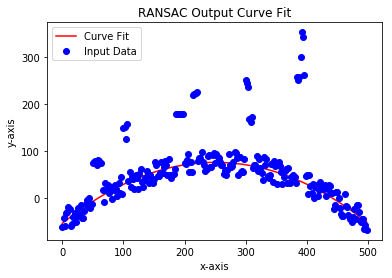

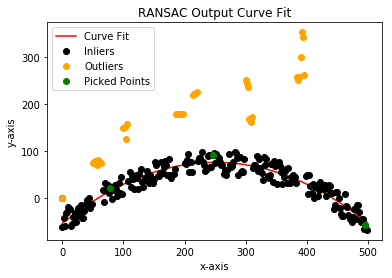

In [57]:
ransac(x_data2,y_data2, 10000, 45,95)

Question 3:

The concept of homography in Computer Vision is used to understand, explain and study visual perspective,
and, specifically, the difference in appearance of two plane objects viewed from different points of view. This
concept will be taught in more detail in the coming lectures. For now, you just need to know that given
4 corresponding points on the two different planes, the homography between them is computed using the
following system of equations Ax = 0, where:

1. Show mathematically how you will compute the SVD for the matrix A. 
2. Write python code to compute the SVD. 

Solution: 

1. Solved in the Report
2. Code to compute SVD:


In [71]:

import numpy as np
from numpy import linalg as LA
import pprint

#variable declaration and initialization

x1 =5
y1 = 5
xp1 = 100
yp1 = 100
x2 = 150
y2 = 5
xp2 = 200
yp2 = 80
x3 = 150
y3 = 150
xp3 = 220
yp3 = 80
x4 = 5
y4 = 150
xp4 = 100
yp4 = 200

# Matrix A
A = np.array([[-x1, -y1, -1, 0, 0, 0, x1*xp1, y1*xp1, xp1],
             [0, 0, 0, -x1, -y1, -1, x1*yp1, y1*yp1, yp1],
             [-x2, -y2, -1, 0, 0, 0, x2*xp2, y2*xp2, xp2],
             [0, 0, 0, -x2, -y2, -1, x2*yp2, y2*yp2, yp2],
             [-x3, -y3, -1, 0, 0, 0, x3*xp3, y3*xp3, xp3],
             [0, 0, 0, -x3, -y3, -1, x3*yp3, y3*yp3, yp3],
             [-x4, -y4, -1, 0, 0, 0, x4*xp4, y4*xp4, xp4],
             [0 , 0, 0, -x4, -y4, -1, x4*yp4, y4*yp4, yp4]],dtype='float64')

print("Matrix A is:\n",A)

# A transpose
At = np.transpose(A)
print("A transpose is given as:\n",At)

# A times A transpose
AAt = np.matmul(A,At)
print("A times A transpose is:\n",AAt)

# Eigen values and Eigen vectors of A times A transpose
eigenval_AAt, eigenvec_AAt = LA.eig(AAt)
print("Eigen value of A times A transpose is:\n",eigenval_AAt)

# A transpose times A
AtA = np.matmul(At,A)
print("A transpose times A is:\n",AtA)

#Eigen values and Eigen vectors of A transpose times A
eigenval_AtA, eigenvec_AtA = LA.eig(AtA)
print("Eigen value of A transpose times A is:\n",eigenval_AtA)

# the columns of U are the left singular vectors
U = eigenvec_AAt
print("The U matrix is:\n",U)

# V transpose has rows that are the right singular vectors
Vt = eigenvec_AtA
print("The V transpose matrix is:\n",Vt)

# S is a diagonal matrix containing singular values
S = np.diag(np.sqrt(eigenval_AAt))
S = np.concatenate((S,np.zeros((8,1))), axis = 1)
print("S matrix is given as:\n",S)

# The Homography matrix
H = Vt[:,8]
H = np.reshape(Vt[:,8],(3,3))
print("The homography matrix is:\n",H)

Matrix A is:
 [[-5.0e+00 -5.0e+00 -1.0e+00  0.0e+00  0.0e+00  0.0e+00  5.0e+02  5.0e+02
   1.0e+02]
 [ 0.0e+00  0.0e+00  0.0e+00 -5.0e+00 -5.0e+00 -1.0e+00  5.0e+02  5.0e+02
   1.0e+02]
 [-1.5e+02 -5.0e+00 -1.0e+00  0.0e+00  0.0e+00  0.0e+00  3.0e+04  1.0e+03
   2.0e+02]
 [ 0.0e+00  0.0e+00  0.0e+00 -1.5e+02 -5.0e+00 -1.0e+00  1.2e+04  4.0e+02
   8.0e+01]
 [-1.5e+02 -1.5e+02 -1.0e+00  0.0e+00  0.0e+00  0.0e+00  3.3e+04  3.3e+04
   2.2e+02]
 [ 0.0e+00  0.0e+00  0.0e+00 -1.5e+02 -1.5e+02 -1.0e+00  1.2e+04  1.2e+04
   8.0e+01]
 [-5.0e+00 -1.5e+02 -1.0e+00  0.0e+00  0.0e+00  0.0e+00  5.0e+02  1.5e+04
   1.0e+02]
 [ 0.0e+00  0.0e+00  0.0e+00 -5.0e+00 -1.5e+02 -1.0e+00  1.0e+03  3.0e+04
   2.0e+02]]
A transpose is given as:
 [[-5.0e+00  0.0e+00 -1.5e+02  0.0e+00 -1.5e+02  0.0e+00 -5.0e+00  0.0e+00]
 [-5.0e+00  0.0e+00 -5.0e+00  0.0e+00 -1.5e+02  0.0e+00 -1.5e+02  0.0e+00]
 [-1.0e+00  0.0e+00 -1.0e+00  0.0e+00 -1.0e+00  0.0e+00 -1.0e+00  0.0e+00]
 [ 0.0e+00 -5.0e+00  0.0e+00 -1.5e+02  0.0e+00